# Credit card fraud analysis and detection using cluster analysis
### Problem Statement
Sometimes credit card get stolen and fraudulent transactions are made using the stolen cards, using this dataset which contains 1000 sample of credit card activities (normal and fraudulent), we will use cluster analysis to discover patterns between transactions to better identify fraudulent ones and stop them in the future
### Source of the dataset 
The dataset we use is from <a href = "https://www.kaggle.com">Kaggle.com</a><br>
The dataset is plit between 2 files:
- Train: `fraudTrain.csv`: which is what we will use for analysis and training 
- Test: `fraudTest.csv`: which we will use to evaluate of the models

In [1]:
# ignore warnings throughout the code 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import essential librraries 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

## Step 0. Data exploration

In [3]:
# Load the train data 
data = pd.read_csv('data/fraud_data.csv')
data.head(10)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,538471,2020-12-28 08:16:01,2.305337e+15,fraud_Kutch LLC,gas_transport,57.32,Jeffrey,Rice,M,21447 Powell Circle,...,40.6866,-92.6833,1132,Probation officer,1961-02-14,05c626b143ac44baaf6116130044440b,1388218561,41.373937,-92.644546,0
1,309991,2020-10-17 03:25:17,3.789049e+14,"fraud_Ferry, Lynch and Kautzer",misc_net,759.50,Tina,Zimmerman,F,3595 Susan Island Suite 063,...,35.7382,-98.7388,1675,Barrister,1986-05-01,8c12434a87697413c258e2b7f5ba65ce,1381980317,35.574699,-98.030415,1
2,282284,2020-10-04 22:45:11,4.926376e+15,fraud_Will Ltd,food_dining,51.10,Claire,Davis,F,83685 Matthew Center Suite 870,...,36.3011,-91.5281,4726,Pharmacologist,1977-06-07,3a3eeaf9766340719cfe96faecc2f29d,1380926711,36.259143,-91.148550,0
3,241342,2020-09-16 08:57:20,3.530504e+15,"fraud_Heller, Gutmann and Zieme",grocery_pos,277.62,David,Nichols,M,0638 Fred Ramp Suite 086,...,34.5715,-118.0231,171170,Chemical engineer,1963-06-04,11f32237c017fe2f34b1011f98ec6158,1379321840,35.431109,-117.100512,1
4,113580,2020-07-30 23:38:50,4.352307e+18,fraud_Macejkovic-Lesch,shopping_pos,975.25,Joseph,Bartlett,M,610 Pacheco Parkway,...,38.8856,-77.1802,116155,Armed forces training and education officer,1932-05-09,135d392c8bd3fbe6198116d7dd00726f,1375227530,38.385786,-77.238447,1
5,112899,2020-07-30 17:02:31,4.328928e+15,fraud_Gerlach Inc,shopping_net,5.29,Margaret,Ray,F,927 Cummings Manor Suite 318,...,42.9373,-87.9943,13973,Logistics and distribution manager,1981-05-06,cb5f2a797953eb594a08c7970e9fa1b9,1375203751,43.325227,-87.427594,0
6,103878,2020-07-27 14:22:13,4.464457e+12,"fraud_Zboncak, Rowe and Murazik",shopping_net,106.84,Breanna,Rodriguez,F,118 Cabrera Springs Apt. 105,...,29.8826,-84.5964,217,Television production assistant,1990-01-24,22c7f1b2ac7500048ca36d75817a6d36,1374934933,30.853252,-85.114604,0
7,60228,2020-07-12 12:28:46,5.018828e+11,"fraud_Gottlieb, Considine and Schultz",shopping_net,959.71,Melissa,Phillips,F,5069 Scott Pass Apt. 654,...,31.4285,-90.8578,2799,"Therapist, horticultural",1961-01-21,df86ac7e629a9c2d1f5023a71314ae10,1373632126,30.600768,-91.329178,1
8,327231,2020-10-24 20:34:24,4.883407e+12,fraud_Boyer PLC,shopping_net,1041.54,Rachel,Williams,F,6386 Bailey Hill Apt. 421,...,47.5412,-122.2750,837792,Systems developer,1936-12-23,982311611279f5d34b3b9b30004c6371,1382646864,48.287785,-121.801913,1
9,429683,2020-12-04 08:31:31,4.979422e+15,fraud_Friesen-D'Amore,gas_transport,56.62,Kelly,Zimmerman,F,1893 Katie Tunnel,...,41.4193,-99.3844,73,Product designer,1935-02-10,375b1bd21097e91f3f567c698ffc1e2f,1386145891,41.705574,-99.191020,0


In [4]:
len(data)

500

In [5]:
train_data = data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             500 non-null    int64  
 1   trans_date_trans_time  500 non-null    object 
 2   cc_num                 500 non-null    float64
 3   merchant               500 non-null    object 
 4   category               500 non-null    object 
 5   amt                    500 non-null    float64
 6   first                  500 non-null    object 
 7   last                   500 non-null    object 
 8   gender                 500 non-null    object 
 9   street                 500 non-null    object 
 10  city                   500 non-null    object 
 11  state                  500 non-null    object 
 12  zip                    500 non-null    int64  
 13  lat                    500 non-null    float64
 14  long                   500 non-null    float64
 15  city_p

#### Exploring the features 
Seeing what the categorical and the numerical features are.

In [6]:
print('Categorical features are: ', train_data.select_dtypes(include='object').columns)

Categorical features are:  Index(['trans_date_trans_time', 'merchant', 'category', 'first', 'last',
       'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num'],
      dtype='object')


In [7]:
print('Numerical Features are: ', train_data.select_dtypes(exclude='object').columns)

Numerical Features are:  Index(['Unnamed: 0', 'cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop',
       'unix_time', 'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')


As we are doing unsupervised learning we won't need the column `is_fraud` in our dataset

In [8]:
# split into features and labels 
labels = train_data['is_fraud']
train_data = train_data.drop('is_fraud', axis=1)

In [9]:
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long
0,538471,2020-12-28 08:16:01,2.305337e+15,fraud_Kutch LLC,gas_transport,57.32,Jeffrey,Rice,M,21447 Powell Circle,...,52572,40.6866,-92.6833,1132,Probation officer,1961-02-14,05c626b143ac44baaf6116130044440b,1388218561,41.373937,-92.644546
1,309991,2020-10-17 03:25:17,3.789049e+14,"fraud_Ferry, Lynch and Kautzer",misc_net,759.50,Tina,Zimmerman,F,3595 Susan Island Suite 063,...,73669,35.7382,-98.7388,1675,Barrister,1986-05-01,8c12434a87697413c258e2b7f5ba65ce,1381980317,35.574699,-98.030415
2,282284,2020-10-04 22:45:11,4.926376e+15,fraud_Will Ltd,food_dining,51.10,Claire,Davis,F,83685 Matthew Center Suite 870,...,72529,36.3011,-91.5281,4726,Pharmacologist,1977-06-07,3a3eeaf9766340719cfe96faecc2f29d,1380926711,36.259143,-91.148550
3,241342,2020-09-16 08:57:20,3.530504e+15,"fraud_Heller, Gutmann and Zieme",grocery_pos,277.62,David,Nichols,M,0638 Fred Ramp Suite 086,...,93552,34.5715,-118.0231,171170,Chemical engineer,1963-06-04,11f32237c017fe2f34b1011f98ec6158,1379321840,35.431109,-117.100512
4,113580,2020-07-30 23:38:50,4.352307e+18,fraud_Macejkovic-Lesch,shopping_pos,975.25,Joseph,Bartlett,M,610 Pacheco Parkway,...,22046,38.8856,-77.1802,116155,Armed forces training and education officer,1932-05-09,135d392c8bd3fbe6198116d7dd00726f,1375227530,38.385786,-77.238447


## Step 1. Preprocessing

### Features of the dataset:
`IDs index` <br>
`transaction date`<br>
`credit card number`<br>
`merchant`<br>
`category`<br>
`amt`: amountofthe transaction <br>
`first`,`last`: first and last names<br>
`street`, `city`,`state`, `zip code`: location information<br>
`tansaction number`<br>
`lat`,`long`,`merch_lat`, `merch_long`: latitude and longtitude information<br>
`city_pop`: population of the city where the transaction happened<br>
`dob`: date of birth of the person <br>
`gender`<br>
`job`<br>
`unix_time`

#### Evaluating the importance of the each feature to our analysis

In [10]:
train_data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long'],
      dtype='object')

We're going to drop the **names** and **locations** as well as **card numbers**, **transaction numbers** and **ids**, there are the **coordinates** and **populations** as well to remove

In [11]:
train_data = train_data.drop(['Unnamed: 0', 'cc_num', 'first', 'last', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop',  'trans_num', 'unix_time',
       'merch_lat', 'merch_long'], axis=1)
train_data.head()

,trans_date_trans_time,merchant,category,amt,gender,job,dob
0,2020-12-28 08:16:01,fraud_Kutch LLC,gas_transport,57.32,M,Probation officer,1961-02-14
1,2020-10-17 03:25:17,"fraud_Ferry, Lynch and Kautzer",misc_net,759.50,F,Barrister,1986-05-01
2,2020-10-04 22:45:11,fraud_Will Ltd,food_dining,51.10,F,Pharmacologist,1977-06-07
3,2020-09-16 08:57:20,"fraud_Heller, Gutmann and Zieme",grocery_pos,277.62,M,Chemical engineer,1963-06-04
4,2020-07-30 23:38:50,fraud_Macejkovic-Lesch,shopping_pos,975.25,M,Armed forces training and education officer,1932-05-09


In [12]:
len(train_data['category'].unique())

14

### Feature engineering

**Transaction date feature:**<br>
The code snippet converts the transaction datetime column into separate columns for year and month and drops the original datetime column.

In [13]:
train_data['trans_date_trans_time'] = pd.to_datetime(train_data['trans_date_trans_time'])

# Extract year and month into separate columns
train_data['Year'] = train_data['trans_date_trans_time'].dt.year
train_data['Month'] = train_data['trans_date_trans_time'].dt.month

# Drop the original 'Onboard_date' column
train_data.drop('trans_date_trans_time', axis=1, inplace=True)

In [14]:
train_data.tail()

,merchant,category,amt,gender,job,dob,Year,Month
495,fraud_Lemke-Gutmann,shopping_net,1114.79,F,"Psychologist, counselling",1988-03-09,2020,7
496,"fraud_Boehm, Block and Jakubowski",misc_pos,3.58,F,Lexicographer,1990-11-23,2020,11
497,fraud_Beier-Hyatt,shopping_pos,20.85,F,Tax inspector,1988-10-26,2020,11
498,fraud_Wilkinson LLC,personal_care,40.27,F,Architectural technologist,1961-10-24,2020,12
499,fraud_Schmidt and Sons,shopping_net,916.14,M,Senior tax professional/tax inspector,1982-01-07,2020,11


**Date of birth feature:**
The code converts the date of birth column to a datetime format, calculates the age by subtracting the year of birth from the current year, and drops the original date of birth column.

In [15]:
from datetime import datetime

train_data['dob'] = pd.to_datetime(train_data['dob'])

# Calculate current date
current_date = datetime.now().year

# Calculate age by subtracting 'DOB' from current date and extracting years
train_data['Age'] = (current_date - train_data['dob'].dt.year)
train_data.drop('dob', axis=1, inplace=True)
train_data.head()

,merchant,category,amt,gender,job,Year,Month,Age
0,fraud_Kutch LLC,gas_transport,57.32,M,Probation officer,2020,12,63
1,"fraud_Ferry, Lynch and Kautzer",misc_net,759.50,F,Barrister,2020,10,38
2,fraud_Will Ltd,food_dining,51.10,F,Pharmacologist,2020,10,47
3,"fraud_Heller, Gutmann and Zieme",grocery_pos,277.62,M,Chemical engineer,2020,9,61
4,fraud_Macejkovic-Lesch,shopping_pos,975.25,M,Armed forces training and education officer,2020,7,92


### Data Cleaning 
#### Checking for and eliminating missing values

In [16]:
train_data.isnull().sum()

merchant    0
category    0
amt         0
gender      0
job         0
Year        0
Month       0
Age         0
dtype: int64

It appears that the dataset has no missing values in any of the columns

#### Checking for duplicate records

In [17]:
sum(train_data.duplicated())

0

It appears that the dataset has no duplicated records

### Handling Outliers
The code calculates z-scores for the 'Age' column in the DataFrame and removes outliers beyond a threshold of 3 standard deviations.

In [18]:
from scipy.stats import zscore
# Calculate z-scores
z_scores = zscore(train_data['Age'])

# Define a threshold for outlier removal (e.g., 3 standard deviations)
outlier_threshold = 3

# Remove rows beyond the threshold
features = train_data[abs(z_scores) < outlier_threshold]

# Display the DataFrame with outliers removed
print("\nDataFrame with Outliers Removed:")
print(features)


DataFrame with Outliers Removed:
                              merchant       category      amt gender  \
0                      fraud_Kutch LLC  gas_transport    57.32      M   
1       fraud_Ferry, Lynch and Kautzer       misc_net   759.50      F   
2                       fraud_Will Ltd    food_dining    51.10      F   
3      fraud_Heller, Gutmann and Zieme    grocery_pos   277.62      M   
4               fraud_Macejkovic-Lesch   shopping_pos   975.25      M   
..                                 ...            ...      ...    ...   
495                fraud_Lemke-Gutmann   shopping_net  1114.79      F   
496  fraud_Boehm, Block and Jakubowski       misc_pos     3.58      F   
497                  fraud_Beier-Hyatt   shopping_pos    20.85      F   
498                fraud_Wilkinson LLC  personal_care    40.27      F   
499             fraud_Schmidt and Sons   shopping_net   916.14      M   

                                             job  Year  Month  Age  
0                   

#### Scaling and Encoding
**Scaling the Numerical Features**<br>
The code standardizes the 'amt' feature in the `features` DataFrame using `StandardScaler`, ensuring that its values have a mean of 0 and a standard deviation of 1.

In [19]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
# Perform standardization
scaler = StandardScaler()
train_data['amt'] = scaler.fit_transform(train_data[['amt']])

**Encoding the Categorical Features**<br>
The code applies label encoding to the categorical features in the `features` DataFrame using `LabelEncoder`, transforming them into numerical representations suitable for machine learning algorithms.

In [20]:
encoder =  LabelEncoder()
categorical_features = ['merchant','category','gender','job']
# Fit and transform categorical features
for feature in categorical_features:
    train_data[feature] = encoder.fit_transform(train_data[feature])

In [21]:
train_data.head()

,merchant,category,amt,gender,job,Year,Month,Age
0,164,2,-0.650537,1,173,2020,12,63
1,80,8,1.144772,0,20,2020,10,38
2,302,1,-0.666440,0,166,2020,10,47
3,114,4,-0.087282,1,34,2020,9,61
4,182,12,1.696394,1,17,2020,7,92


<hr>

## Step 2. Visualization

In [110]:
import seaborn as sns

In [109]:
train=train_data.join(labels)

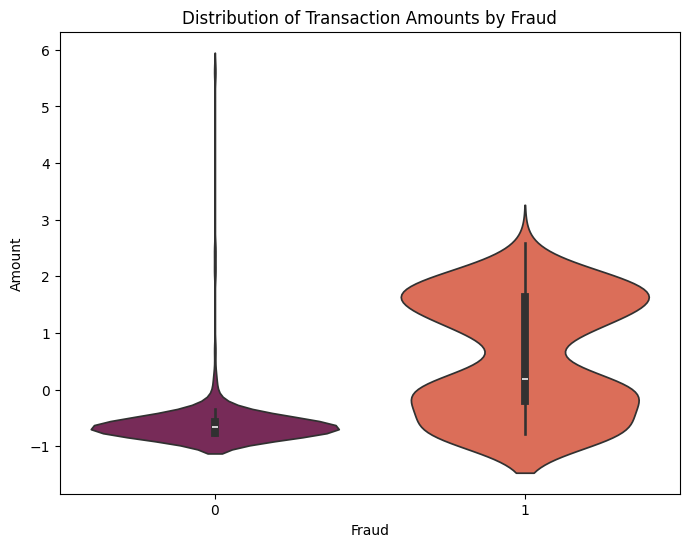

In [111]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='is_fraud', y='amt', data=train,palette='rocket')
plt.xlabel('Fraud')
plt.ylabel('Amount')
plt.title('Distribution of Transaction Amounts by Fraud')
plt.show()

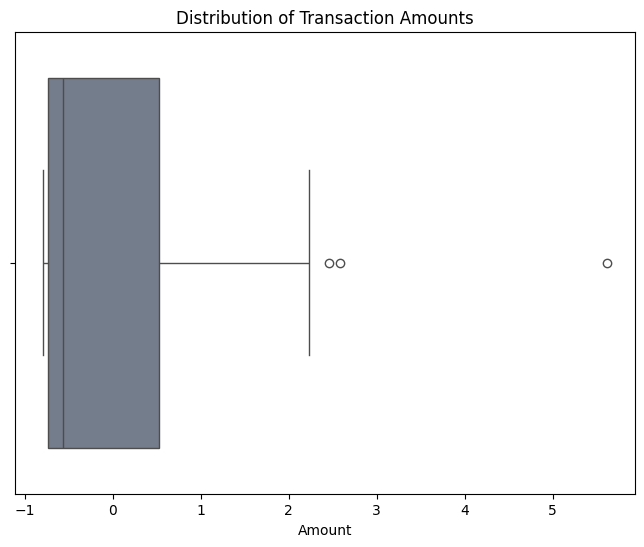

In [112]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='amt',data=train,palette='bone')
plt.xlabel('Amount')
plt.title('Distribution of Transaction Amounts')
plt.show()

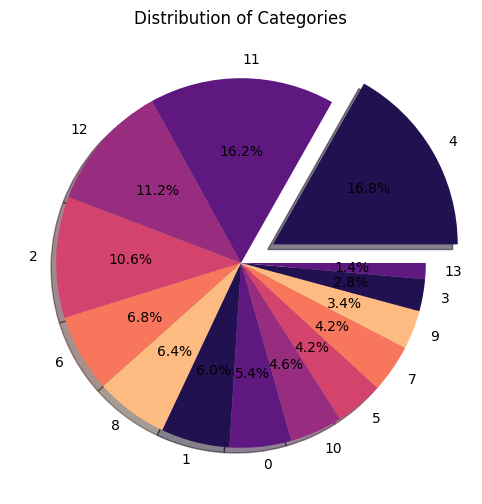

In [113]:
plt.figure(figsize=(8, 6))
category_counts = train_data['category'].value_counts()
labels = category_counts.index
counts = category_counts.values
explode=[0.2,0,0,0,0,0,0,0,0,0,0,0,0,0]

plt.pie(counts, labels=labels,explode=explode,shadow=True,autopct='%1.1f%%',colors=sns.color_palette('magma'))
plt.title('Distribution of Categories')
plt.show()

The most common category amongst merchants is grocery_pos 

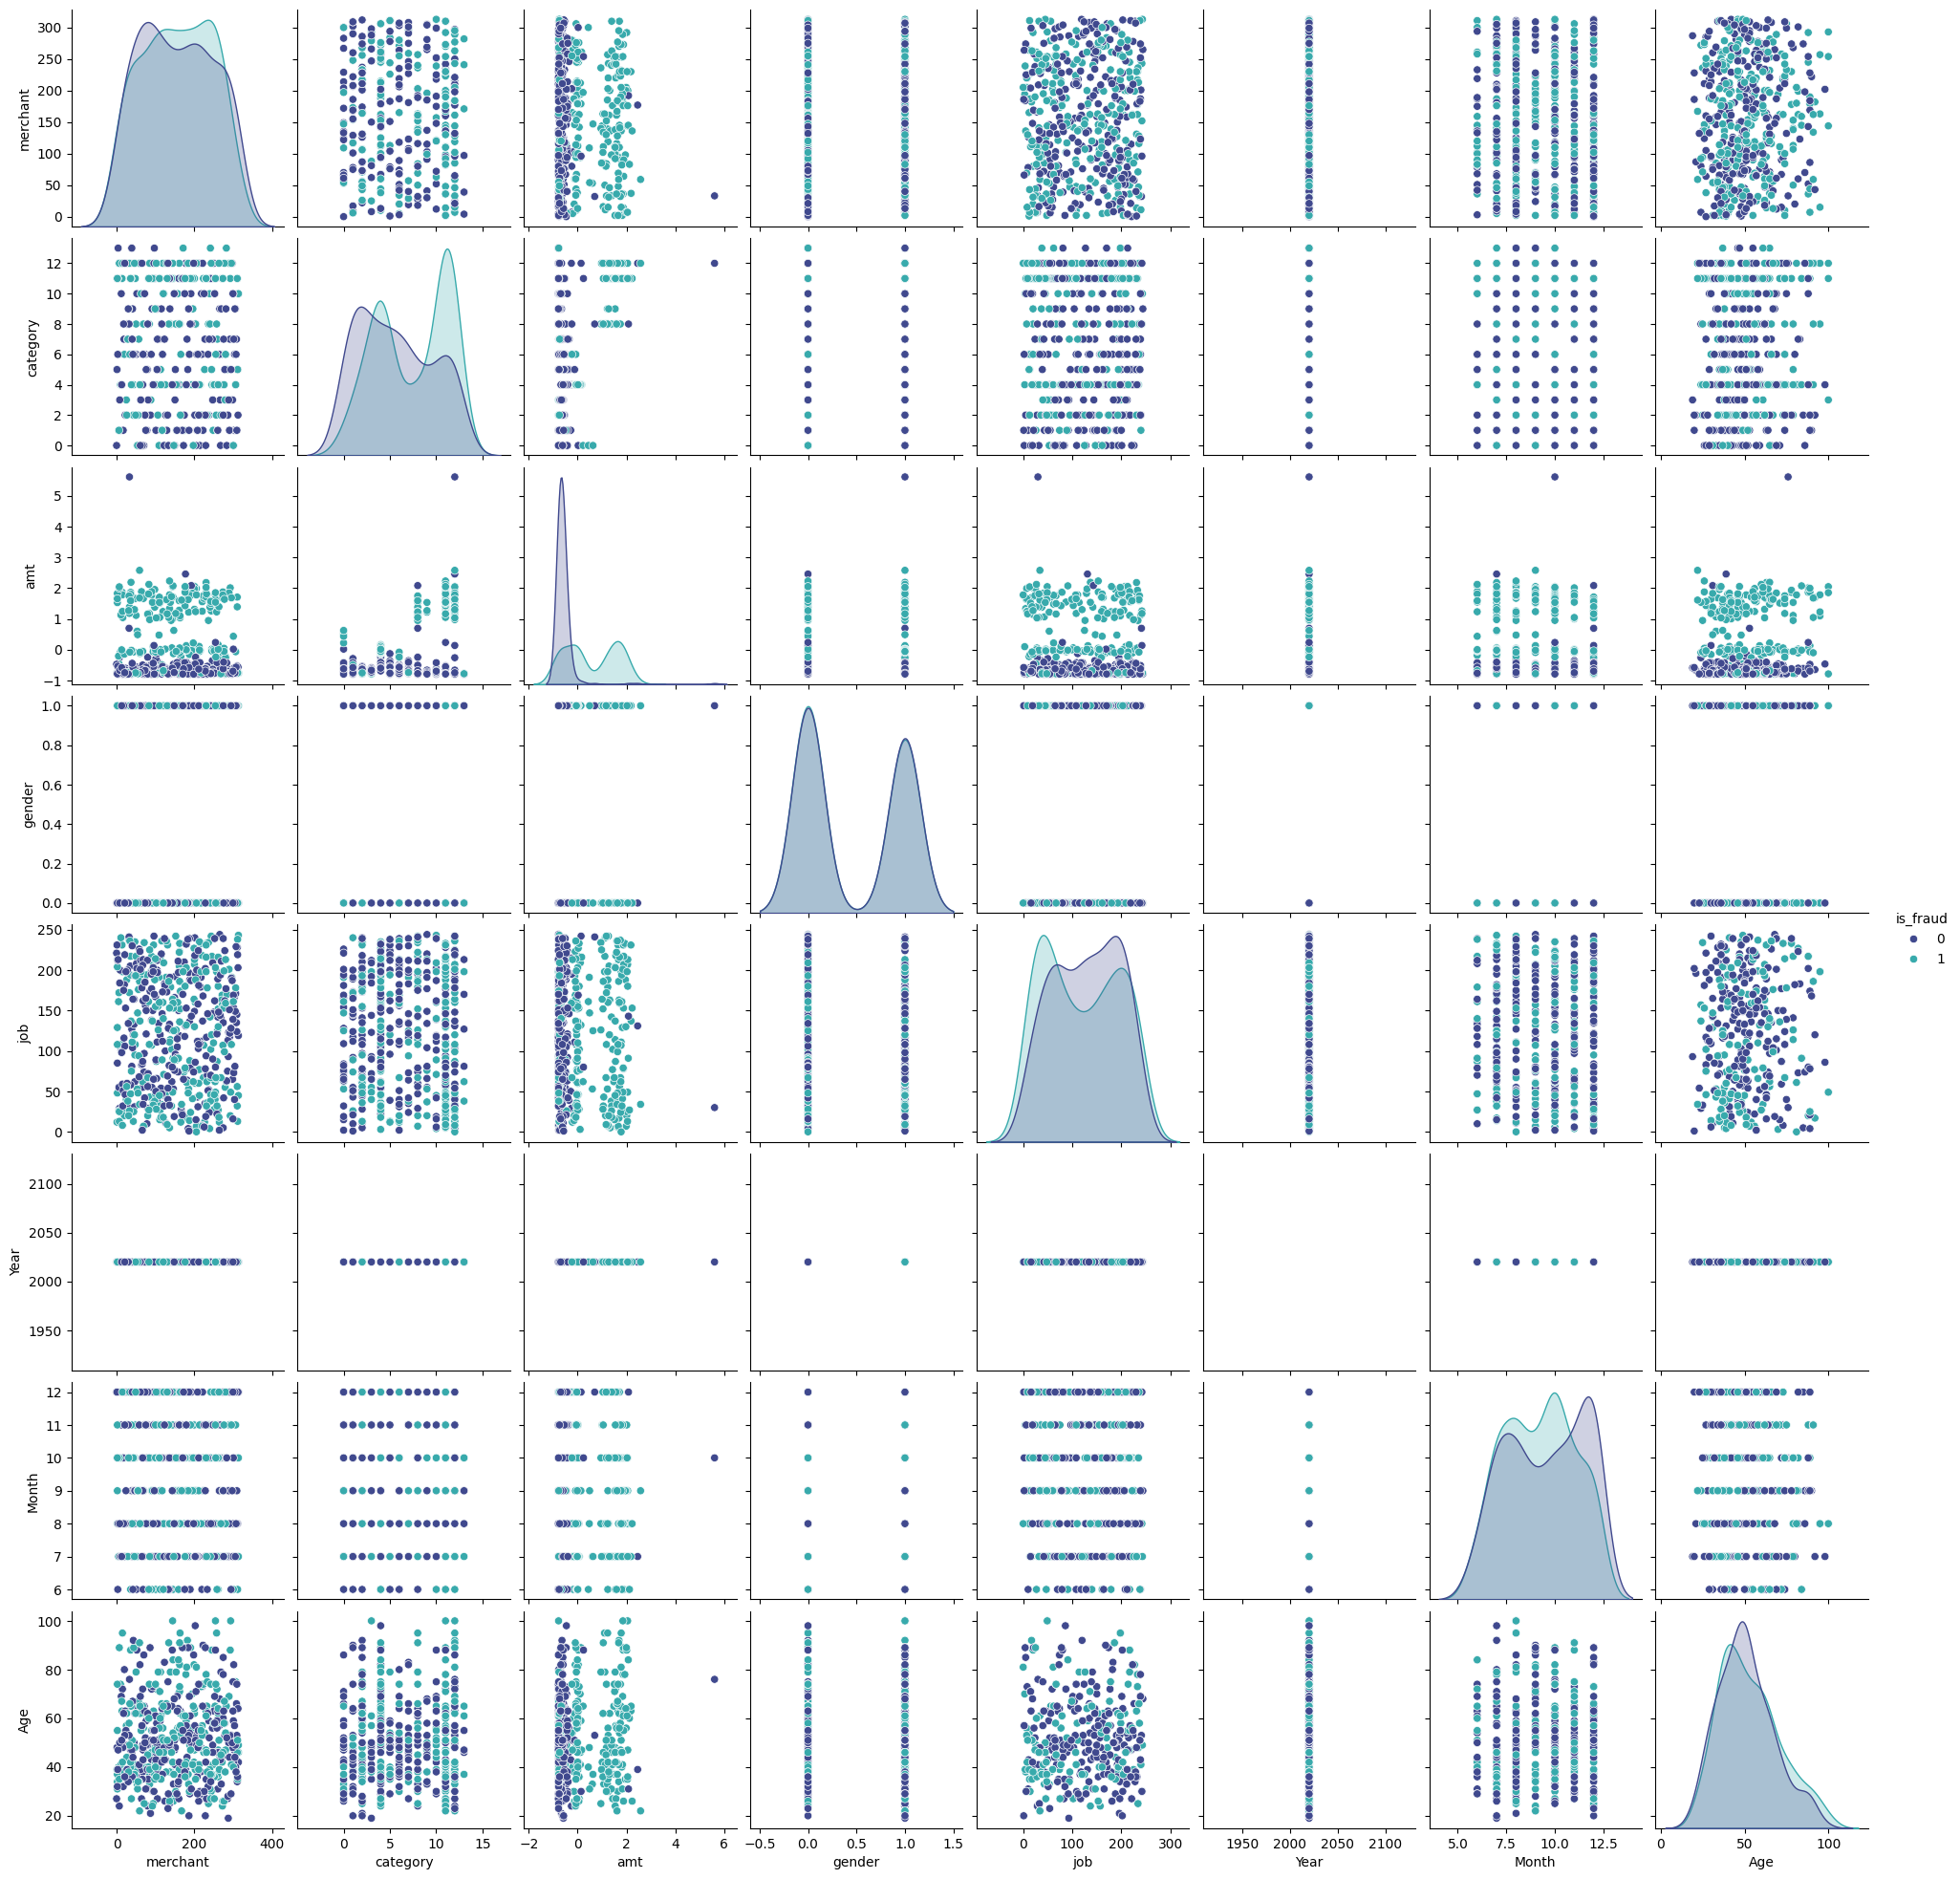

In [114]:
sns.pairplot(train,hue='is_fraud',palette="mako")
plt.show()

A pairplot to show relations with every feature and the target 'is_fraud'

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


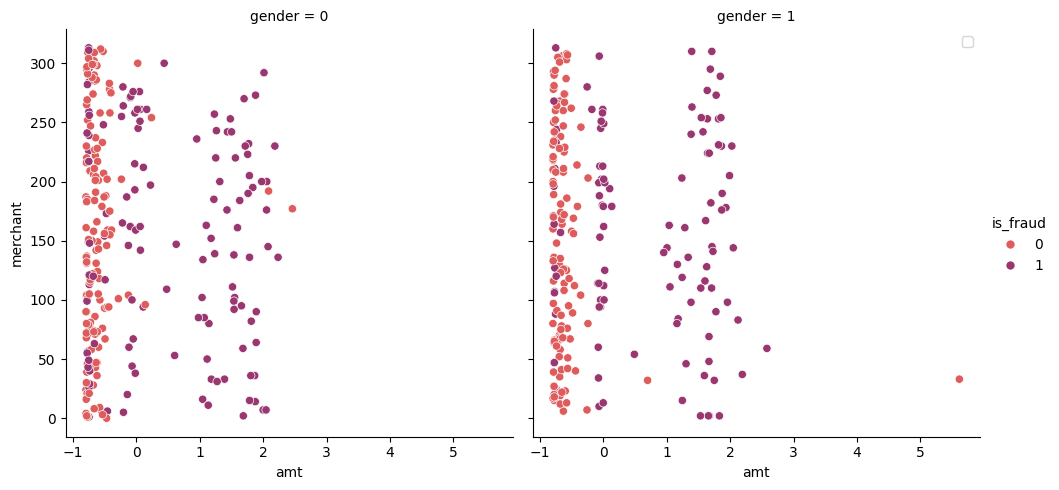

In [115]:
sns.relplot(x='amt',y='merchant',data=train,hue='is_fraud',col=train_data['gender'],palette='flare')
plt.legend()
plt.show()

This graph shows the distribution of transaction amount made among merchants relaive to their gender

We notice that males tend to make fraud transactions more than females

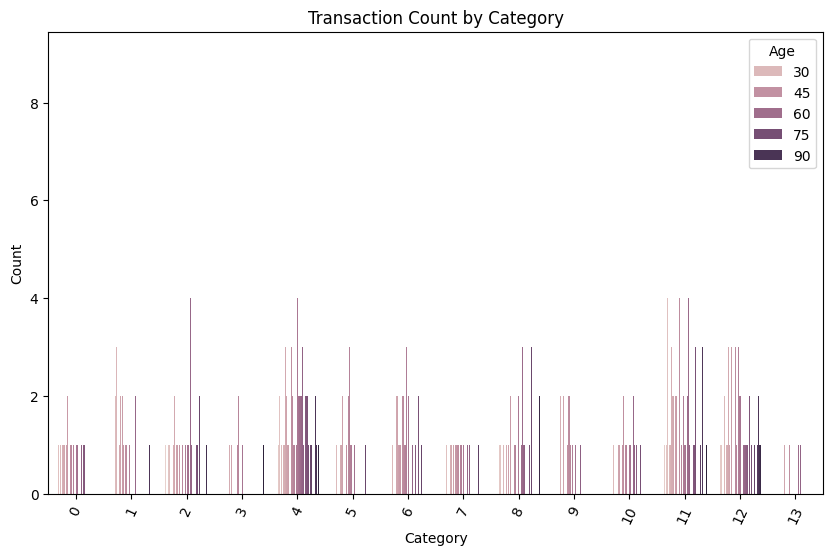

In [116]:
plt.figure(figsize=(10, 6))
sns.countplot(x=train_data['category'],data=train,hue='Age')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=65)

plt.title('Transaction Count by Category')
plt.show()

This graph is to see how the different ages are drawn into different merchants

It's noticable how different merchant categories like shopping_net, grocery_net, kids_pets have a high gap between a specific age and the other ages

<hr>

## Step 3. Clustering
In this section, we will use 2 clustering techniques to cluster the data into *fraud* and *legitimate* transaction.<br>
Techniques used are:
- `K-medoids clustering`
- `Fuzzy Clustering` 

### First: Kmedoids Technique
Train the model using the training dataset

In [22]:
from sklearn_extra.cluster import KMedoids

# instantiate the model and trainig the model
kmedoids = KMedoids(n_clusters=2).fit(train_data)


In [23]:
kmedoids.labels_

array([0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,

#### Visualizing the dataset with the centers fitted by the algorithm

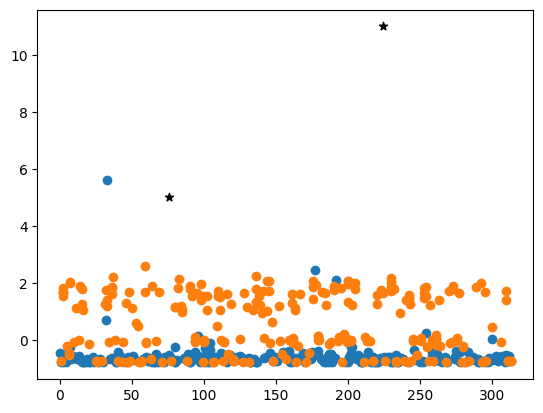

In [24]:
# plotting the merchant and Age features wih their true label values
for label in labels.unique():
    cluster_points = train_data[labels == label]
    plt.scatter(cluster_points['merchant'], cluster_points['amt'])

# Plot cluster medoids
cluster_medoids = kmedoids.cluster_centers_
plt.scatter(cluster_medoids[:, 0], cluster_medoids[:, 1], c='black', marker='*')
plt.show()

Visualizing clusters with their true vs predicted labels

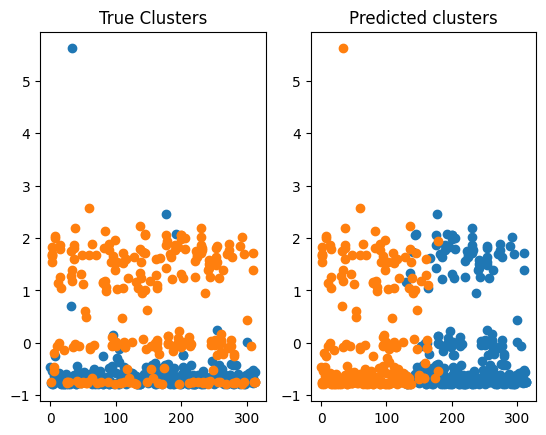

In [25]:
# True labels
plt.subplot(1,2,1)
for label in labels.unique():
   cluster_points = train_data[labels == label]
   plt.scatter(cluster_points['merchant'], cluster_points['amt'])
plt.title('True Clusters')
# kmedoids clusters
plt.subplot(1,2,2)
for label in labels.unique():
   cluster_points = train_data[kmedoids.labels_ == label]
   plt.scatter(cluster_points['merchant'], cluster_points['amt'])
plt.title('Predicted clusters')
#plt.scatter(cluster_medoids[:, 0], cluster_medoids[:, 1], c='green', marker='*')
plt.show()

##### Model Evaluation
Evaluating the clustering algorithm isn't as simple as calculating precision and recall, as we should not be looking at the absolute values of the true labels but rather if this clustering define spearation similar to the ground truth.<br><br>
**First Metric** <br>
We will use the `Fowlkes-Mallows score` evaluation metric.<br>
it's a function that can be used when the ground truth class assignments of the samples is known.<br>
<br><img src="image.png" width=200>

In [26]:
from sklearn.metrics import fowlkes_mallows_score

FMI = fowlkes_mallows_score(labels, kmedoids.labels_)
print("Fowlkes-Mallows score = ", FMI)

Fowlkes-Mallows score =  0.49852343503175345


##### Observation
According to <a href="https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation">scikit-learn docs</a> a perfect `FMI` score would be 1 and a very bad one would be 0, so as we get `0.498`, we see that almost half of the predictions for the clusters are true which is not completely bad but I don't think the Kmedoids clustering is a good choice for the data either.<br>
<center>________________________________________</center>

**Second Metric**<br>
We will use `Silhouette Coefficient`.<br>
it's used if the ground truth labels are not known, evaluation must be performed using the model itself.<br><br>
<img src="image.png" width=200>

In [27]:
from sklearn.metrics import silhouette_score

silhouette = silhouette_score(train_data, kmedoids.labels_, metric='euclidean')
print('Silhouette score = ', silhouette)

Silhouette score =  0.37595550496146196


##### Observation
A general rule of thumb is that a silhouette score above 0.5 indicates a good clustering, a silhouette score below 0.25 indicates a bad clustering, and a silhouette score between 0.25 and 0.5 indicates a fair clustering. <br>
And since our score was around `0.375` it may seem that our clustering is fair but bordering on bad in this case.

<hr>

### Second: Hierarchical Clustering
We will use the `linkage()` function from scipy to perform the hierarchical clustering and we will apply the clustering 3 times, each time with a different linkage type:
- `single` linkage
- `complete` linkage
- `average` linkage <br><br>
and will compare the **Silhouette** and **FMI** score of each of them

##### Single linkage clustering

In [28]:
from scipy.cluster.hierarchy import dendrogram, linkage

# define linkage method to cluster the data
z = linkage(train_data, method='single', metric='euclidean')

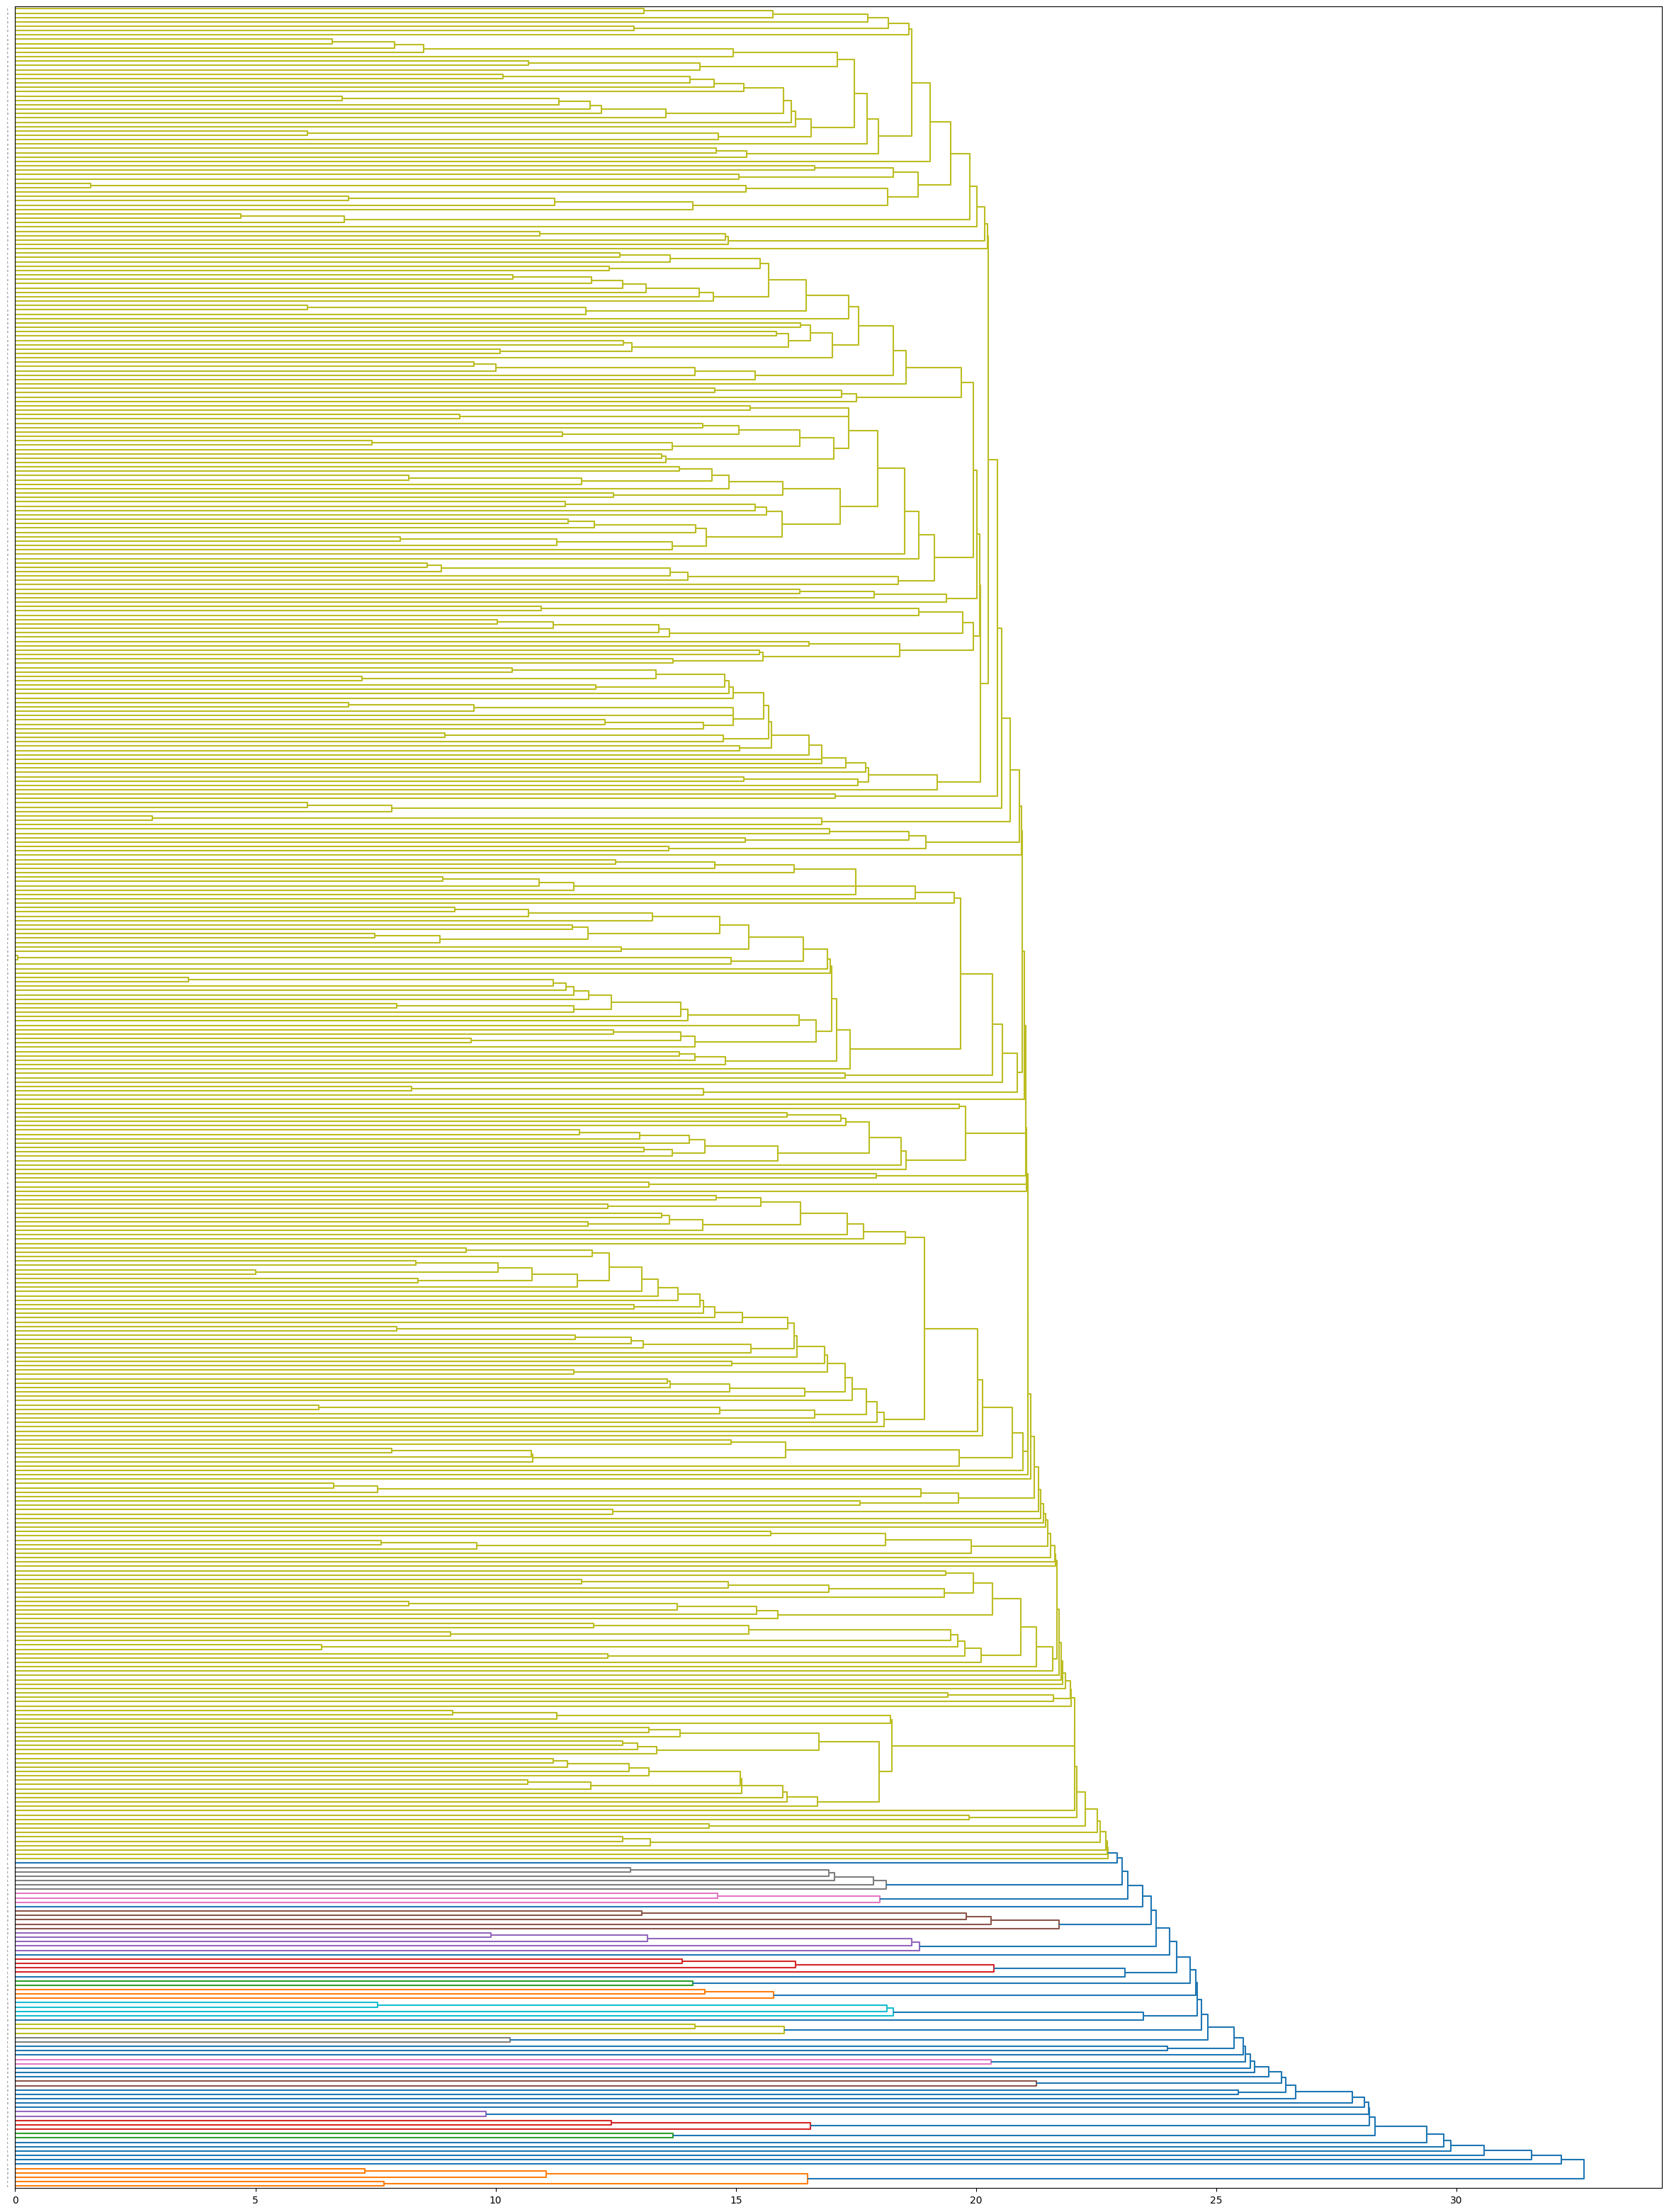

In [29]:
# plotting the dendogram 
labelList = list(labels)

plt.figure(figsize=(30,40))
dendrogram(z, labels= labelList, leaf_font_size=2, orientation='right')
plt.show()

##### Complete linkage method

In [30]:
z2 = linkage(train_data, method='complete',metric='euclidean')

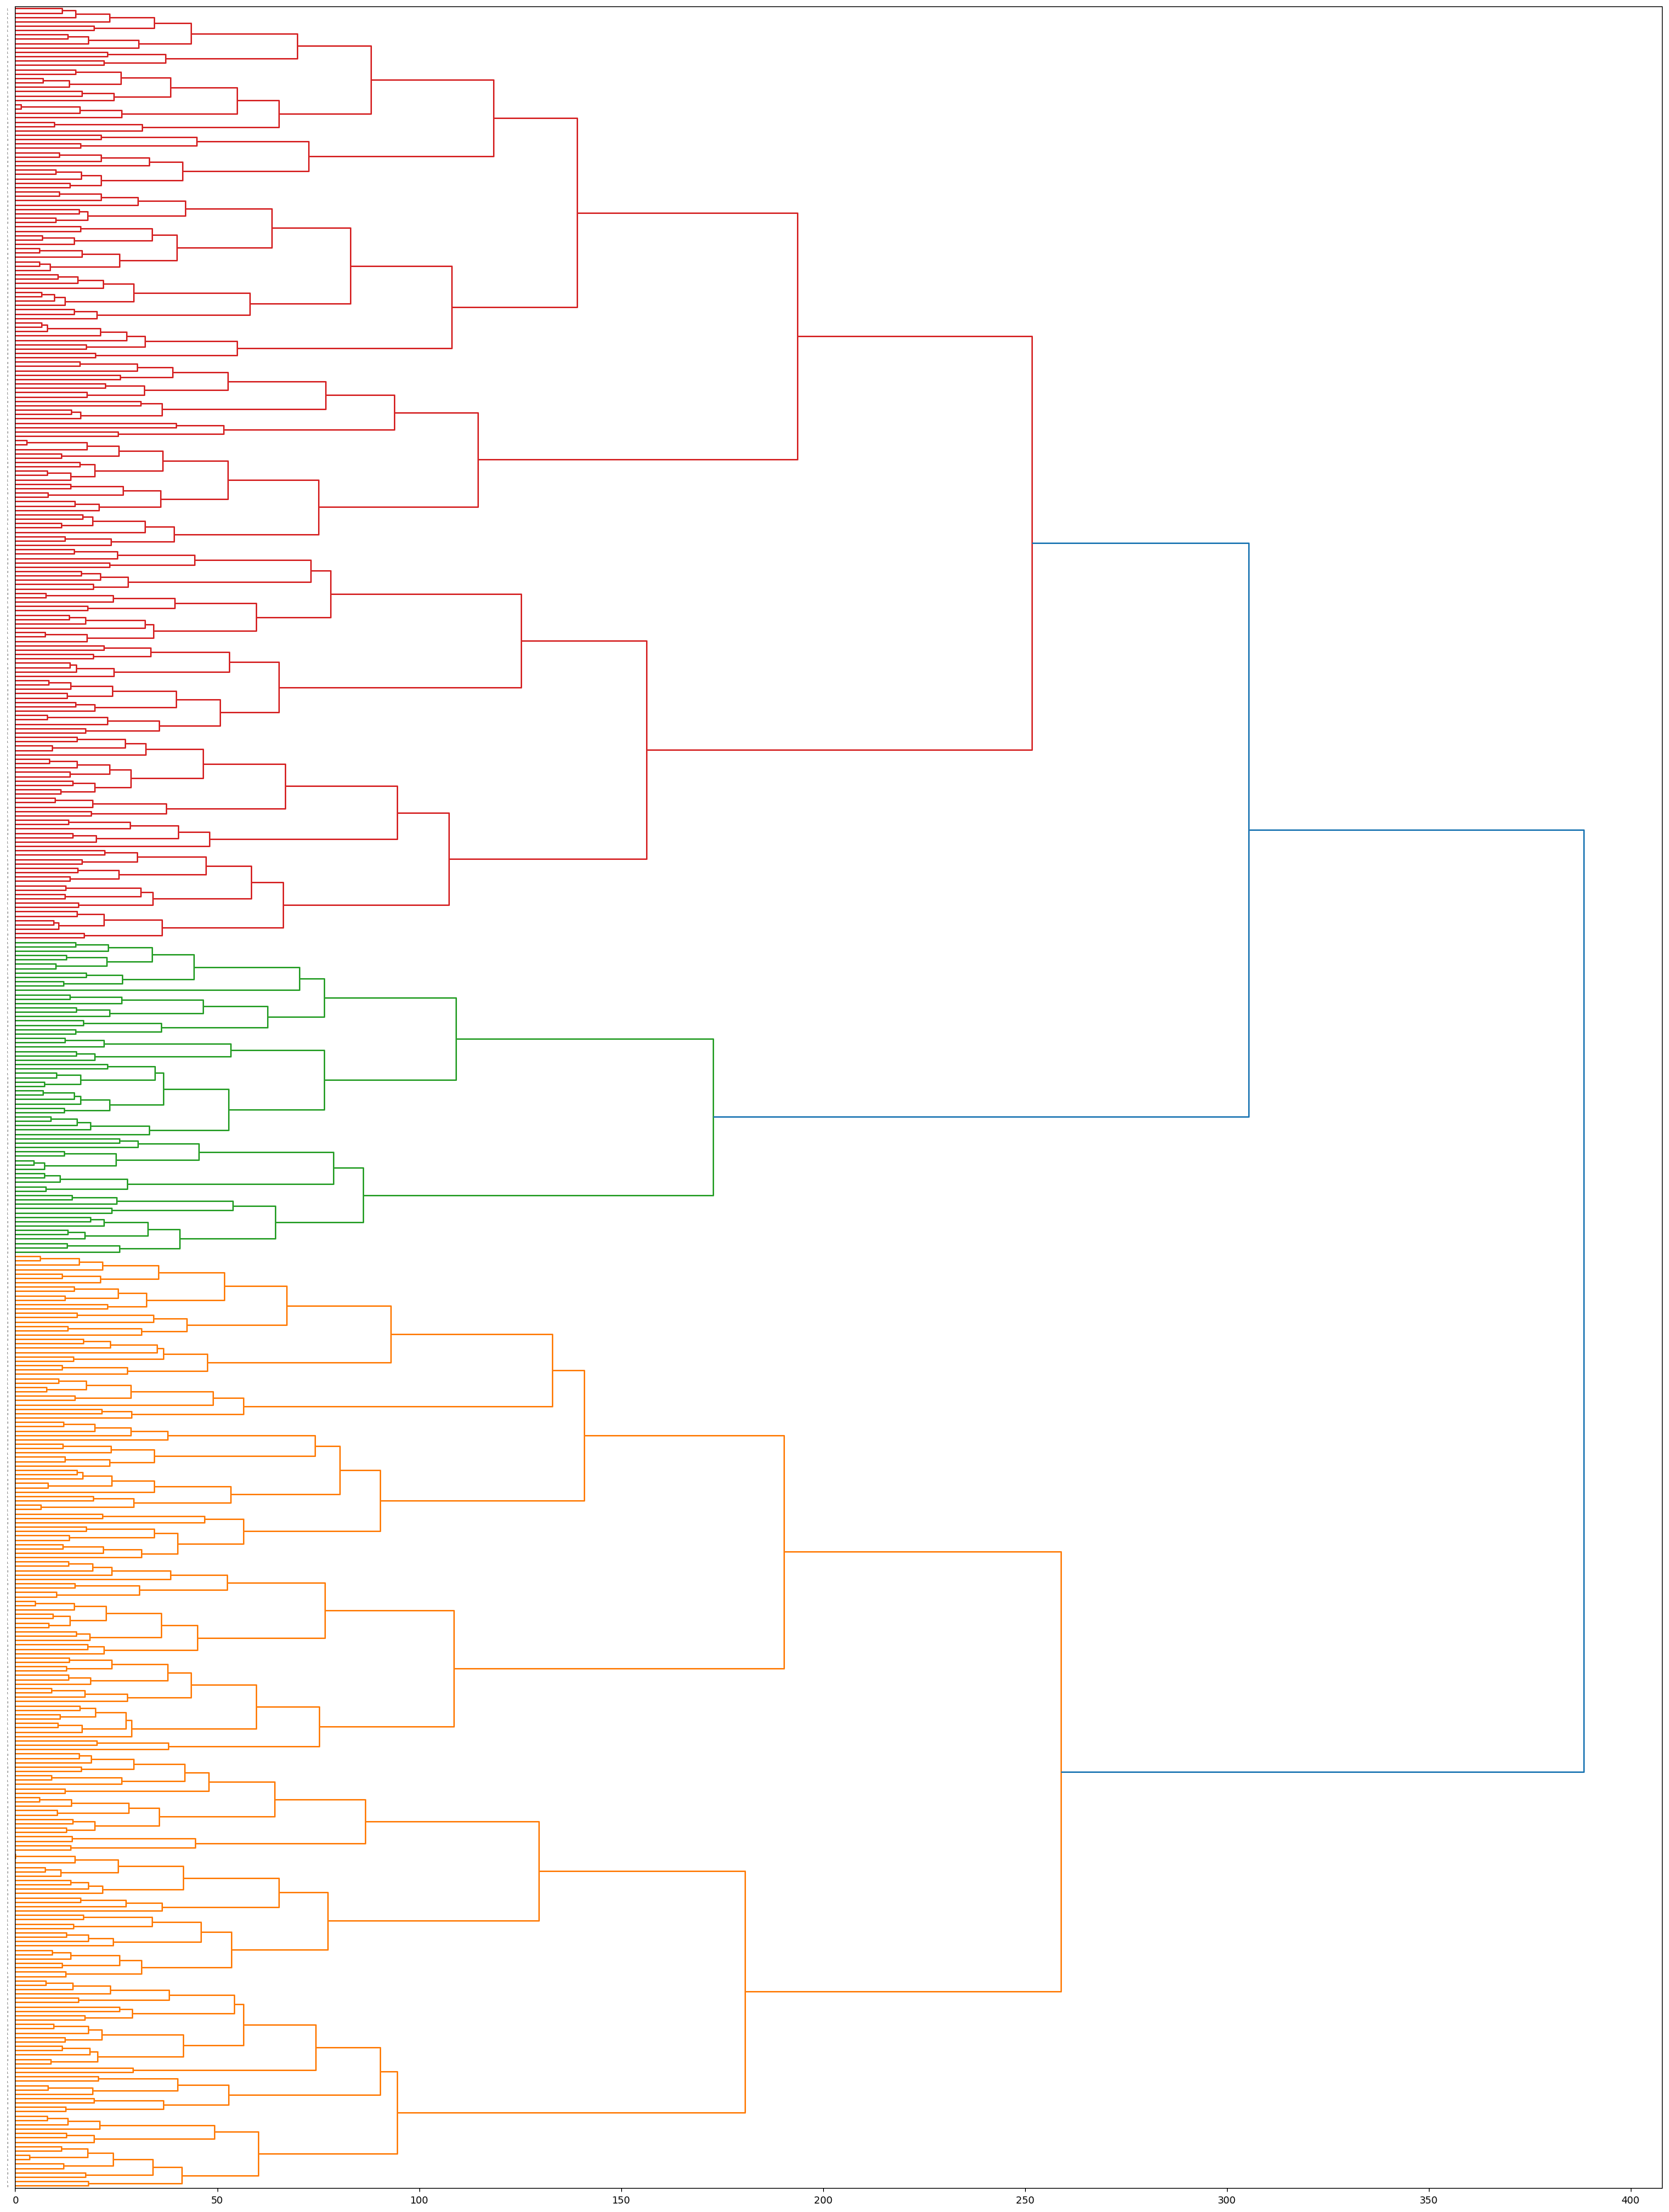

In [31]:
# plotting the dendogram 
plt.figure(figsize=(30,40))
dendrogram(z2, labels= labelList, leaf_font_size=2, orientation='right')
plt.show()

##### Average linkage method

In [32]:
z3 = linkage(train_data, method='average',metric='euclidean')

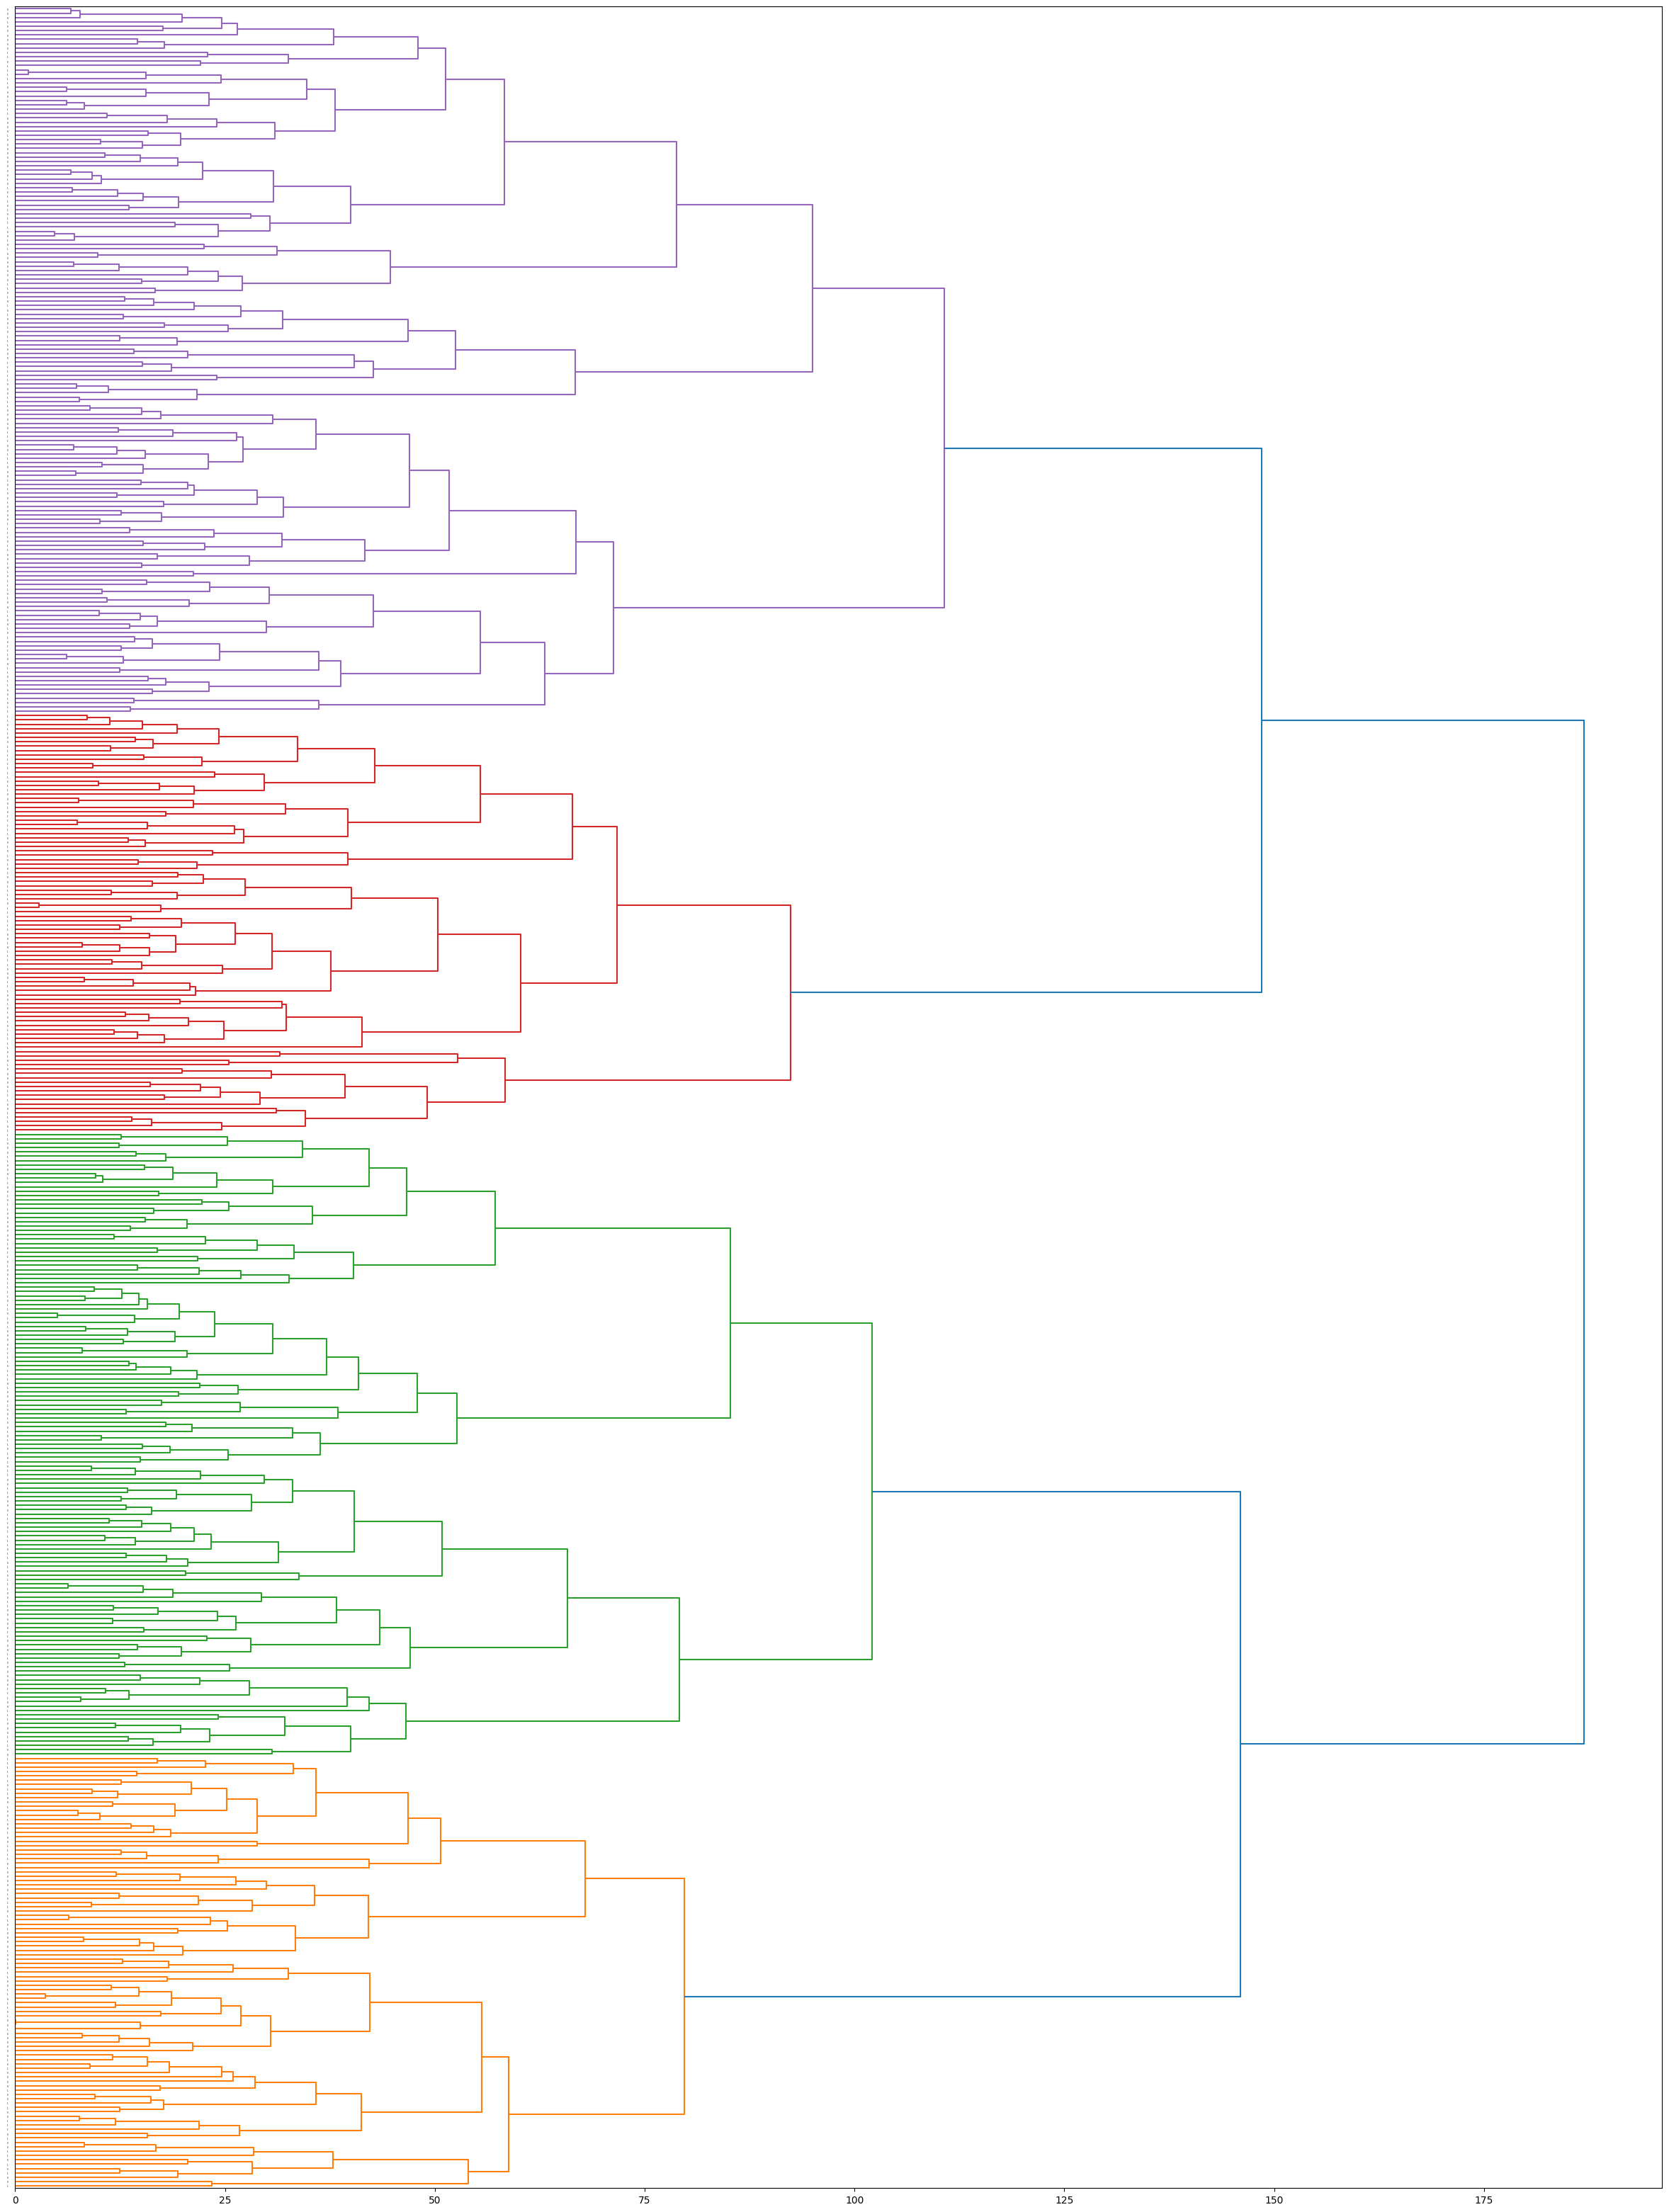

In [33]:
# plotting the dendogram 
plt.figure(figsize=(30,40))
dendrogram(z3, labels= labelList, leaf_font_size=2, orientation='right')
plt.show()

#### Comparing between each linkage 
Using a metric called `cophenetic correaltion coefficient`<br>
Which is calculated between the original distance matrix and the cophenetic distance matrix.

In [103]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

# Single linkage
c1, co_z1 = cophenet(z, pdist(train_data))
c1


0.24460020834514

In [104]:
# Complete Linkage
c2, co_z2 = cophenet(z2, pdist(train_data))
c2

0.6372009352044349

In [100]:
# Average Linkage
c3, co_z3 = cophenet(z3, pdist(train_data))
c3

0.6626221857267603

Putting all scores in a table side by side

In [106]:
cophenet_table = pd.DataFrame({'Single linkage': c1, 'Complete linkage': c2, 'Average linkage': c3}, index=['Cophenet correlation coefficient'])
cophenet_table.head()

,Single linkage,Complete linkage,Average linkage
Cophenet correlation coefficient,0.2446,0.637201,0.662622


`Observation`<br>
it seems that the clutering with the average linkage produces the best results out of all the algorithms. 

##### Silhouette and FMI scores of each linkage 

In [89]:
from sklearn.cluster import AgglomerativeClustering

Z1= AgglomerativeClustering(n_clusters=2, linkage = 'single')
Z1.fit(train_data)
silhouette_z1 = silhouette_score(train_data, Z1.labels_, metric='euclidean')
fmi_z1= fowlkes_mallows_score(labels, Z1.labels_)
print('Silhouette score of single linkage: ',silhouette_z1)
print('FMI score of single linkage: ', fmi_z1)

Silhouette score of single linkage:  0.21757269900723905
FMI score of single linkage:  0.6993327487122908


In [102]:
from sklearn.cluster import AgglomerativeClustering

Z2= AgglomerativeClustering(n_clusters=2, linkage = 'complete')
Z2.fit(train_data)
silhouette_z2 = silhouette_score(train_data, Z2.labels_, metric='euclidean')
fmi_z2= fowlkes_mallows_score(labels, Z2.labels_)
print('Silhouette score of complete linkage: ',silhouette_z2)
print('FMI score of average linkage: ', fmi_z2)

Silhouette score of complete linkage:  0.3620166076011925
FMI score of average linkage:  0.5033177542537283


In [101]:
from sklearn.cluster import AgglomerativeClustering

Z3= AgglomerativeClustering(n_clusters=2, linkage = 'average')
Z3.fit(train_data)
silhouette_z3 = silhouette_score(train_data, Z3.labels_, metric='euclidean')
fmi_z3= fowlkes_mallows_score(labels, Z3.labels_)
print('Silhouette score of average linkage: ',silhouette_z3)
print('FMI score of average linkage: ', fmi_z3)

Silhouette score of average linkage:  0.3712506374882899
FMI score of average linkage:  0.49905276167352025


`Observation`
It also appears from these two metrics that the average linkage is the better choice in this case.

<hr>

## Step 4. Comparative analysis

### Comparing between hierarchical and kmedoids clustering 
Building a table to compare the `silhouette` and `FMI` scores of the kmedoids and each of the linkages

In [108]:
comparison_table = pd.DataFrame({'Silhouette Score':[silhouette, silhouette_z1, silhouette_z2, silhouette_z3], 'Fowlkes-Mallows Score':[FMI, fmi_z1, fmi_z2, fmi_z3]}, index=['K-medoids', 'Single Linkage', 'Complete Linkage', 'Average Linkage'])
comparison_table.head()

,Silhouette Score,Fowlkes-Mallows Score
K-medoids,0.375956,0.498523
Single Linkage,0.217573,0.699333
Complete Linkage,0.362017,0.503318
Average Linkage,0.371251,0.499053


#### Conclusion
We find that the **Average Linkage** and the **K-medoids** algorithms are almost identical in perforance which is good overall, because we see for example the signle linkage very low in the silhouette score and very high in the fowlkes-mallowes, this could mean that while the algorithm may not be optimizing for compact, well-separated clusters as measured by the silhouette score, it is still effectively capturing the underlying structure present in the data as reflected by the reference clustering.

<hr>